In [1]:
# initialization for my classroom
import os
from datetime import datetime as dt

def logfile(user=os.environ.get('JUPYTERHUB_USER') or 'jovyan'):
    prefix='/srv'
    if os.path.isdir(prefix) and os.access(prefix, os.W_OK):
        prefix+=('/'+user)
        if not os.path.isdir(prefix):
            os.makedirs(prefix)
    else:
        prefix='.'
    return prefix+'/'+dt.now().strftime('%Y%m%d')+'.log'
    #return prefix+'/'+'20220426'+'.log'

In [2]:
import pandas as pd
import numpy as np
import re
ansi_escape = re.compile(r'\x1B(?:[@-Z\\-_]|\[[0-?]*[ -/]*[@-~])')

def activity(user=os.environ.get('JUPYTERHUB_USER') or 'jovyan'):
    df = pd.DataFrame()
    try:
        with open(logfile(user), 'r') as f:
            for line in f:
                try:
                    d = dt.strptime(line, "# %a, %d %b %Y %H:%M:%S ")
                    df_new = pd.DataFrame([[1.,1.,1.]], columns = ["y","exc","area"],index=[pd.Timestamp(d)])
                    df = pd.concat([df,pd.DataFrame(df_new)])
                except:
                    pass
    except:
        pass
    try:
        with open(logfile(user).replace('.log','-exc.log'), 'r') as f:
            for line in f:
                try:
                    #print(ansi_escape.sub('', line))
                    d = dt.strptime(ansi_escape.sub('', line), "%Y-%m-%d %H:%M:%S,%f "+user+" ")
                    df_new = pd.DataFrame([[1.,0.,5.]], columns = ["y","exc","area"],index=[pd.Timestamp(d)])
                    df = pd.concat([df,pd.DataFrame(df_new)])
                except:
                    pass
    except:
        pass
    return df

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

def plot_ax(ax, user=os.environ.get('JUPYTERHUB_USER') or 'jovyan'):
    data = activity(user).sort_index()
    if len(data)>0:
        cmap = plt.cm.Spectral
        ax.scatter(
            x=data.index, y=data['y'].values, 
            c=data['exc'].values, s=data['area'].values*500,
            cmap='Spectral',
            alpha=0.2, edgecolor='none'
        )
    ax.set_ylabel(user, rotation=0, ha="right", va="center")

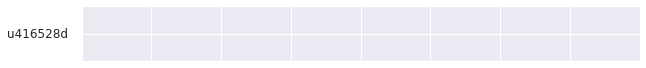

In [4]:
from datetime import date
from datetime import time

fig = plt.figure(figsize=(10,1))
ax = fig.add_subplot(1,1,1)

plt.setp(ax, xlim=(pd.Timestamp(dt.combine(date.today(),time(dt.now().hour-1,))), 
                   pd.Timestamp(dt.combine(date.today(),time(dt.now().hour,59,59)))))
plt.setp(ax, ylim=(0,2))
plt.setp(ax, xticklabels=[])
plt.setp(ax, yticklabels=[])
plot_ax(ax)

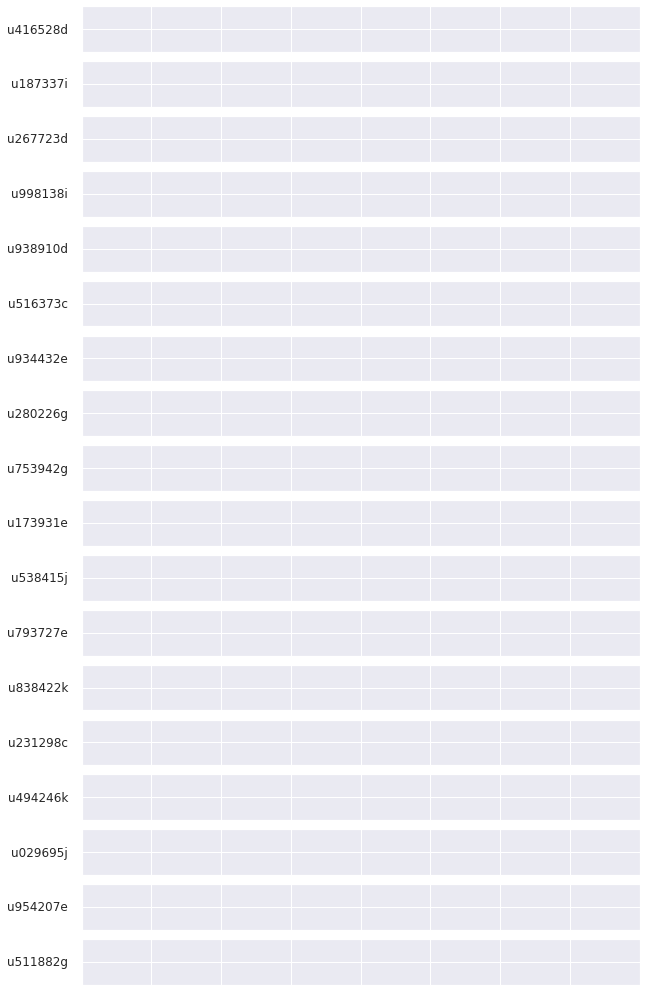

In [5]:
ids='''
u416528d
u187337i
u267723d
u998138i
u938910d
u516373c
u934432e
u280226g
u753942g
u173931e
u538415j
u793727e
u838422k
u231298c
u494246k
u029695j
u954207e
u511882g
'''
users=ids.strip().splitlines()

fig, axes = plt.subplots(len(users),1,figsize=(10,len(users)))

plt.setp(axes, xlim=(pd.Timestamp(dt.combine(date.today(),time(dt.now().hour-1,))), 
                     pd.Timestamp(dt.combine(date.today(),time(dt.now().hour,59,59)))))
plt.setp(axes, ylim=(0,2))
plt.setp(axes, xticklabels=[])
plt.setp(axes, yticklabels=[])

for i in range(len(users)):
    #print(users[i])
    plot_ax(axes[i], users[i])
    #display.display(plt.gcf())

In [ ]:
import datetime
time(dt.now().hour,59,59)

In [19]:
pd.Timestamp(dt.combine(t_date,t_stime)), pd.Timestamp(dt.combine(t_date,t_etime))

(Timestamp('2022-04-26 16:30:00'), Timestamp('2022-04-26 18:30:00'))

## 2022/04/26

In [ ]:
ids='''
u187337i
u998138i
u938910d
u516373c
u934432e
u280226g
u753942g
u173931e
u538415j
u793727e
u838422k
u231298c
u494246k
u029695j
u954207e
u511882g
'''
users=ids.strip().splitlines()

fig, axes = plt.subplots(len(users),1,figsize=(10,len(users)))

t_date=datetime.date(2022,4,26)
t_stime=datetime.time(16, 45)
t_etime=datetime.time(18, 30)

plt.setp(axes, xlim=(pd.Timestamp(dt.combine(t_date,t_stime)), 
                     pd.Timestamp(dt.combine(t_date,t_etime))))
plt.setp(axes, ylim=(0,2))
plt.setp(axes, xticklabels=[])
plt.setp(axes, yticklabels=[])

for i in range(len(users)):
    #print(users[i])
    plot_ax(axes[i], users[i])
    #display.display(plt.gcf())

## 2022/04/19

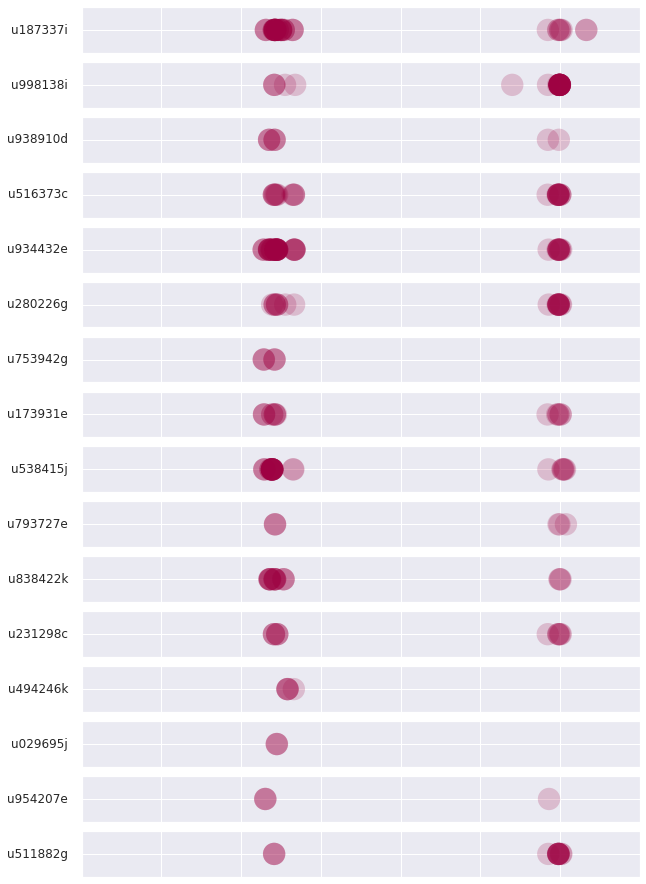

In [28]:
ids='''
u187337i
u998138i
u938910d
u516373c
u934432e
u280226g
u753942g
u173931e
u538415j
u793727e
u838422k
u231298c
u494246k
u029695j
u954207e
u511882g
'''
users=ids.strip().splitlines()

fig, axes = plt.subplots(len(users),1,figsize=(10,len(users)))

t_date=datetime.date(2022,4,19)
t_stime=datetime.time(16, 45)
t_etime=datetime.time(18, 30)

plt.setp(axes, xlim=(pd.Timestamp(dt.combine(t_date,t_stime)), 
                     pd.Timestamp(dt.combine(t_date,t_etime))))
plt.setp(axes, ylim=(0,2))
plt.setp(axes, xticklabels=[])
plt.setp(axes, yticklabels=[])

for i in range(len(users)):
    #print(users[i])
    plot_ax(axes[i], users[i])
    #display.display(plt.gcf())